# AdvancedDataAnalysis

Builds on InitialDataAnalysis ...

It is possible to do a nore detailed silhouette analysis ... look at scores with clusters, etc and with better visualisations (lloks like it is from yellowbrick package but this won't install properly ... MacOS > 10.6)

More information https://www.baeldung.com/cs/silhouette-values-clustering#:~:text=A%20silhouette%20plot%20is%20a%20graphical%20tool%20we%20use%20to,and%20separation%20of%20the%20clusters.

Reference in above suggests we should target a value > 0.7 (https://onlinelibrary.wiley.com/doi/book/10.1002/9780470316801)

Description from https://towardsdatascience.com/silhouette-method-better-than-elbow-method-to-find-optimal-clusters-378d62ff6891

Code from https://gist.githubusercontent.com/satkr7/2a45e3d4af279458b48eba32add0d17e/raw/e9d6796a57098bd29ded167238b6c1f7e9463ce1/silhouette_method.py

Import required packages

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.decomposition import PCA

Load data file

Delete original dataset named columns and use BioCyC metabolite names

Save metabolote names for later

In [3]:
arr_data_pd = pd.read_csv("./Data/Arabidopsis-T87-timeseries-NaCl-by-metabolite-BioCyc-Master.csv", skiprows=1, header=None)
metabolites = arr_data_pd[0] # Save metabolite names for later
#print(metabolites)
arr_data_pd = arr_data_pd.drop(arr_data_pd.columns[[0, 1]], axis=1) # Delete all metabolite names so just raw data

Save a copy of raw data before standardisation, etc.

In [4]:
arr_raw_data_pd = arr_data_pd.copy()
arr_raw_data_pd.head(5)

,2,3,4,5,6,7,8,9
0,1.19,1.32,0.86,0.68,0.54,1.84,3.23,3.63
1,0.87,1.26,0.98,0.67,0.53,4.94,3.67,12.75
2,1.31,1.45,1.18,1.22,0.52,0.59,0.31,0.26
3,1.61,0.72,0.68,1.91,1.42,3.30,0.90,1.40
4,0.75,1.08,0.80,0.55,0.39,0.21,0.87,1.62


Standardize data before applying K-means

In [5]:
scaler = StandardScaler()
arr_data_pd_scaled = scaler.fit_transform(arr_data_pd)
print(arr_data_pd_scaled[0:5])

[[ 0.6718425   0.31533686 -0.48279473 -1.00712844 -1.11087675  1.14998841
   3.30422643  0.90292697]
 [-0.46113611  0.2005841  -0.2703305  -1.04334973 -1.15688276  4.83447359
   3.96742452  4.74872322]
 [ 1.09670948  0.56396784  0.08377655  0.94882101 -1.20288877 -0.3356911
  -1.09699729 -0.51816221]
 [ 2.15887694 -0.83219076 -0.80149108  3.44808975  2.93765186  2.88526208
  -0.20770894 -0.03743768]
 [-0.88600309 -0.14367419 -0.58902685 -1.47800516 -1.80096686 -0.78733767
  -0.25292699  0.05533372]]


/Users/johnpearce/opt/miniconda3/envs/SOM/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2 The average silhouette_score is : 0.3627330225263265


/Users/johnpearce/opt/miniconda3/envs/SOM/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/johnpearce/opt/miniconda3/envs/SOM/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/johnpearce/opt/miniconda3/envs/SOM/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/johnpearce/opt/miniconda3/envs/SOM/lib/python3.11/site-packages/sklearn/cluster/_kme

For n_clusters = 3 The average silhouette_score is : 0.36926102027773555
For n_clusters = 4 The average silhouette_score is : 0.30788840354589025
For n_clusters = 5 The average silhouette_score is : 0.282798096094422
For n_clusters = 6 The average silhouette_score is : 0.2806189224898667


/Users/johnpearce/opt/miniconda3/envs/SOM/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/johnpearce/opt/miniconda3/envs/SOM/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 7 The average silhouette_score is : 0.26445389207120035
For n_clusters = 8 The average silhouette_score is : 0.2883521632946328


/Users/johnpearce/opt/miniconda3/envs/SOM/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/johnpearce/opt/miniconda3/envs/SOM/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/johnpearce/opt/miniconda3/envs/SOM/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 9 The average silhouette_score is : 0.29924584273611277
For n_clusters = 10 The average silhouette_score is : 0.30561859872727587
For n_clusters = 11 The average silhouette_score is : 0.20717839204141797


/Users/johnpearce/opt/miniconda3/envs/SOM/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 12 The average silhouette_score is : 0.20031897704919746


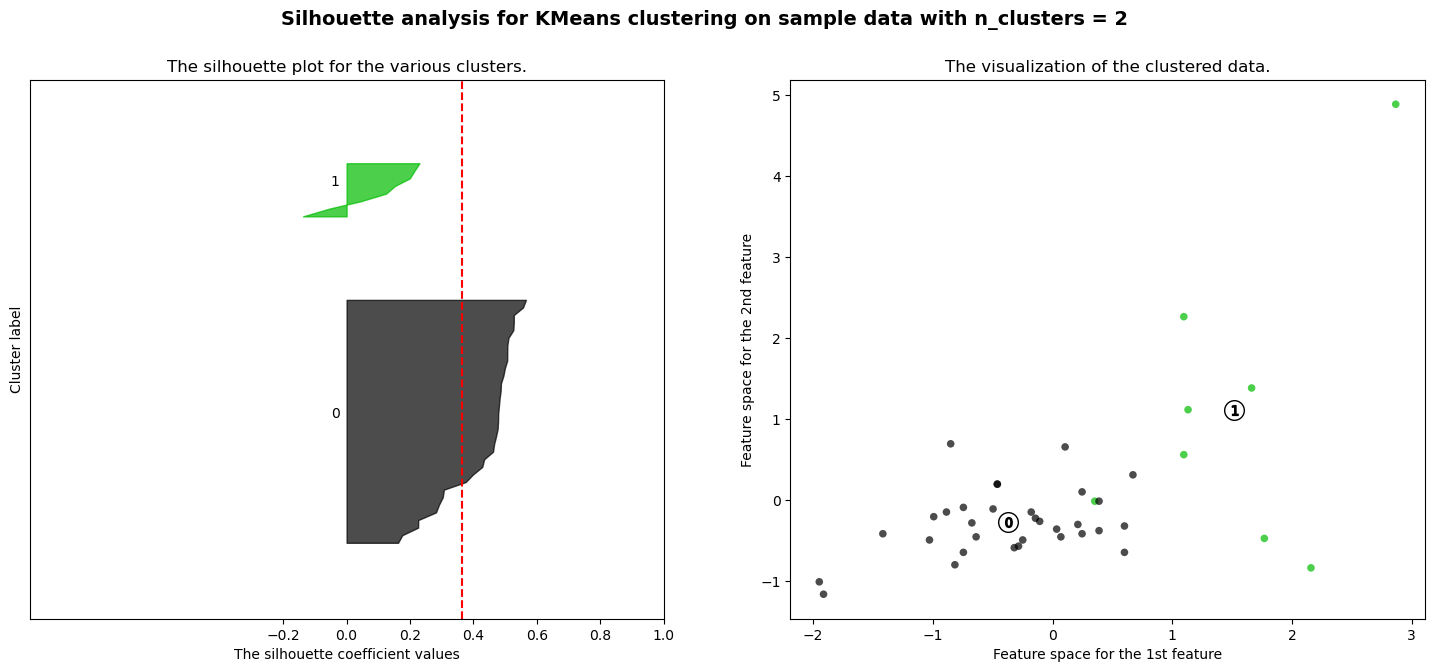

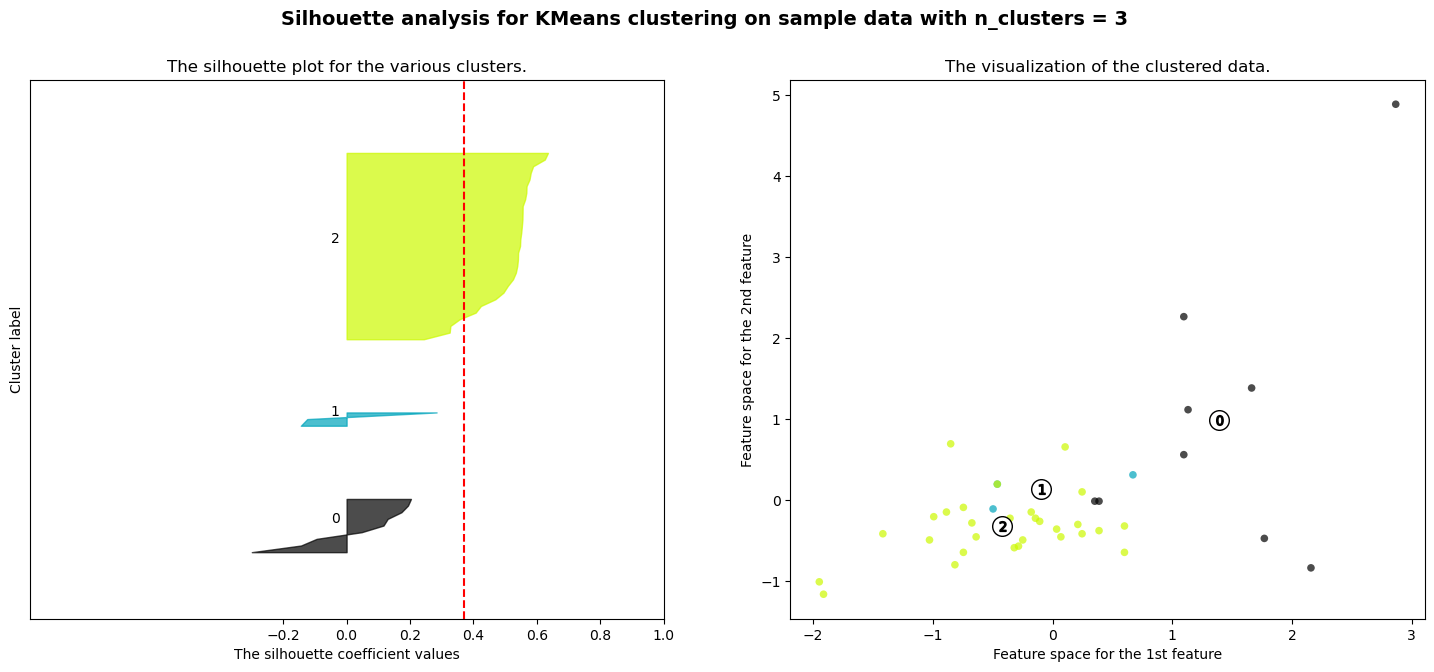

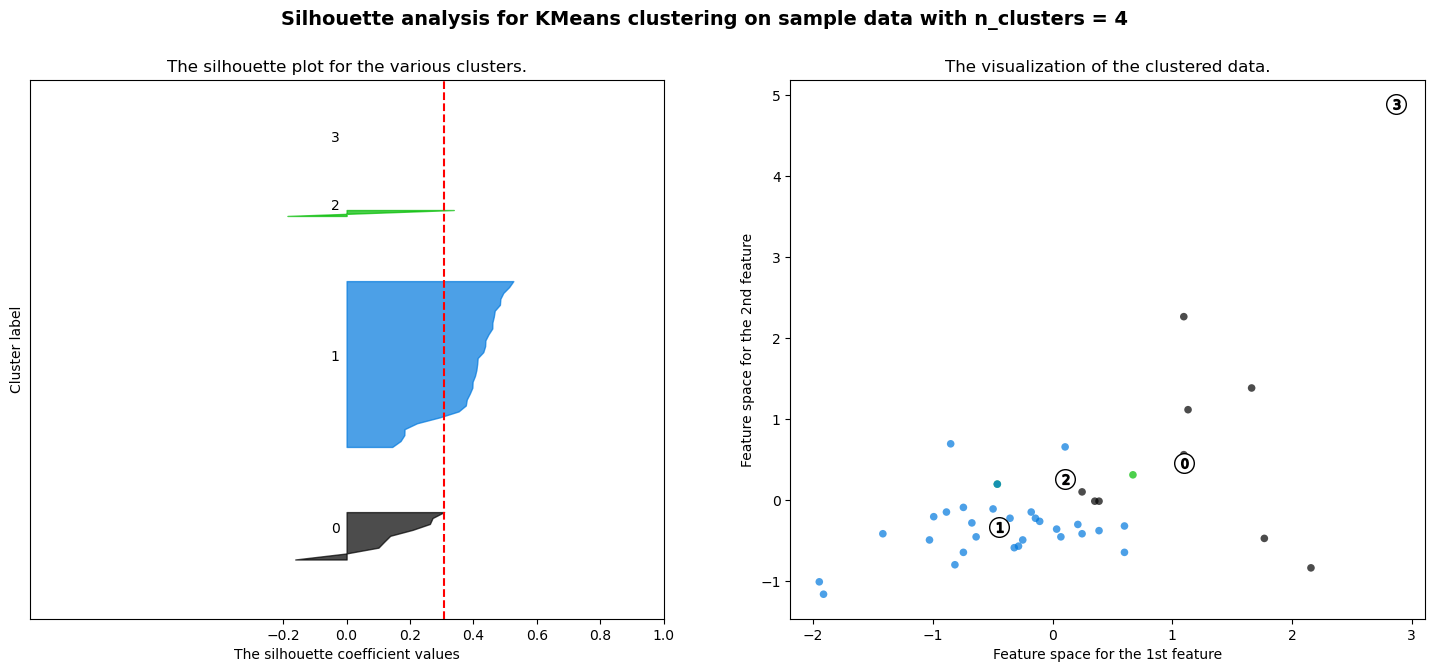

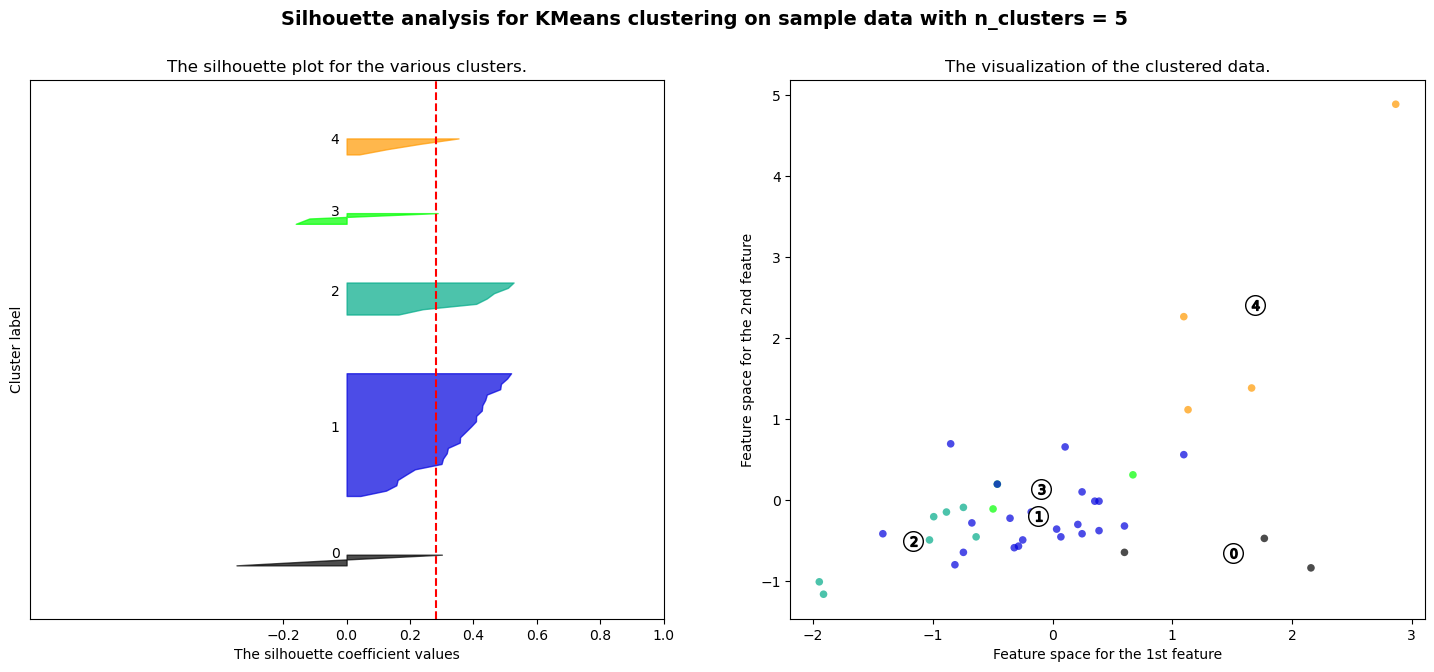

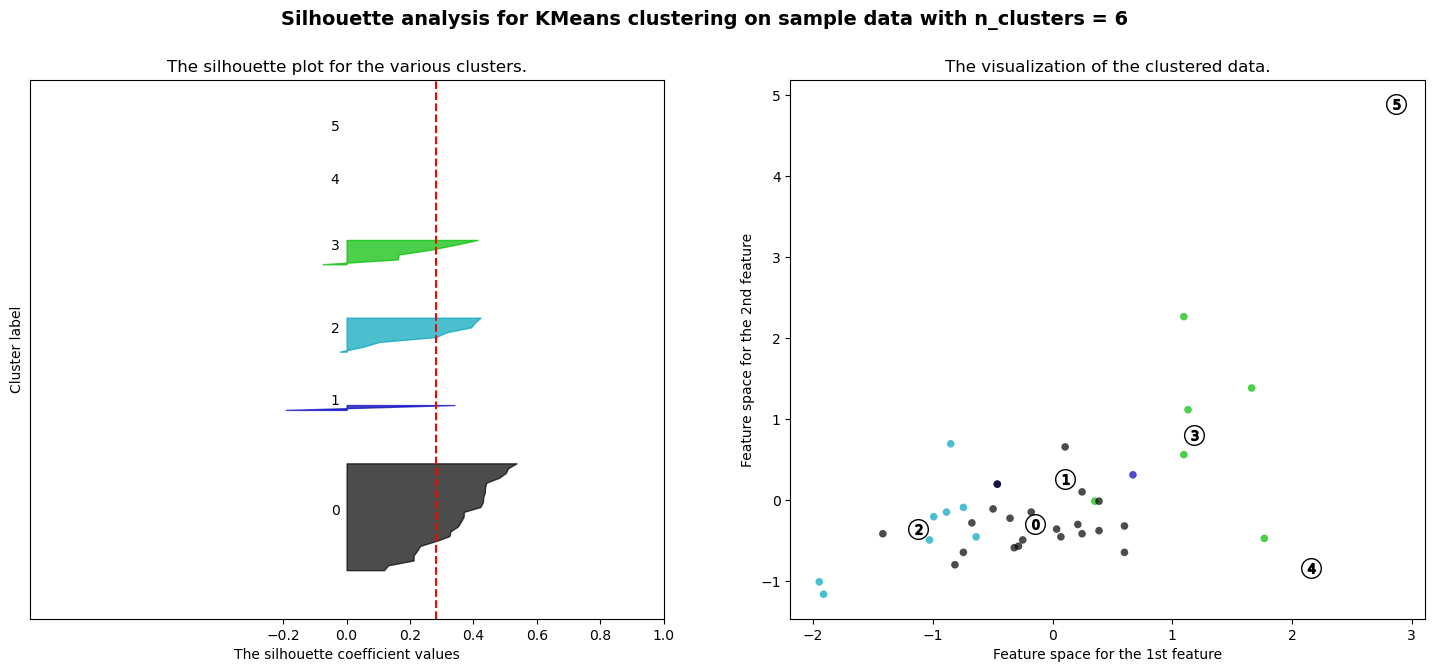

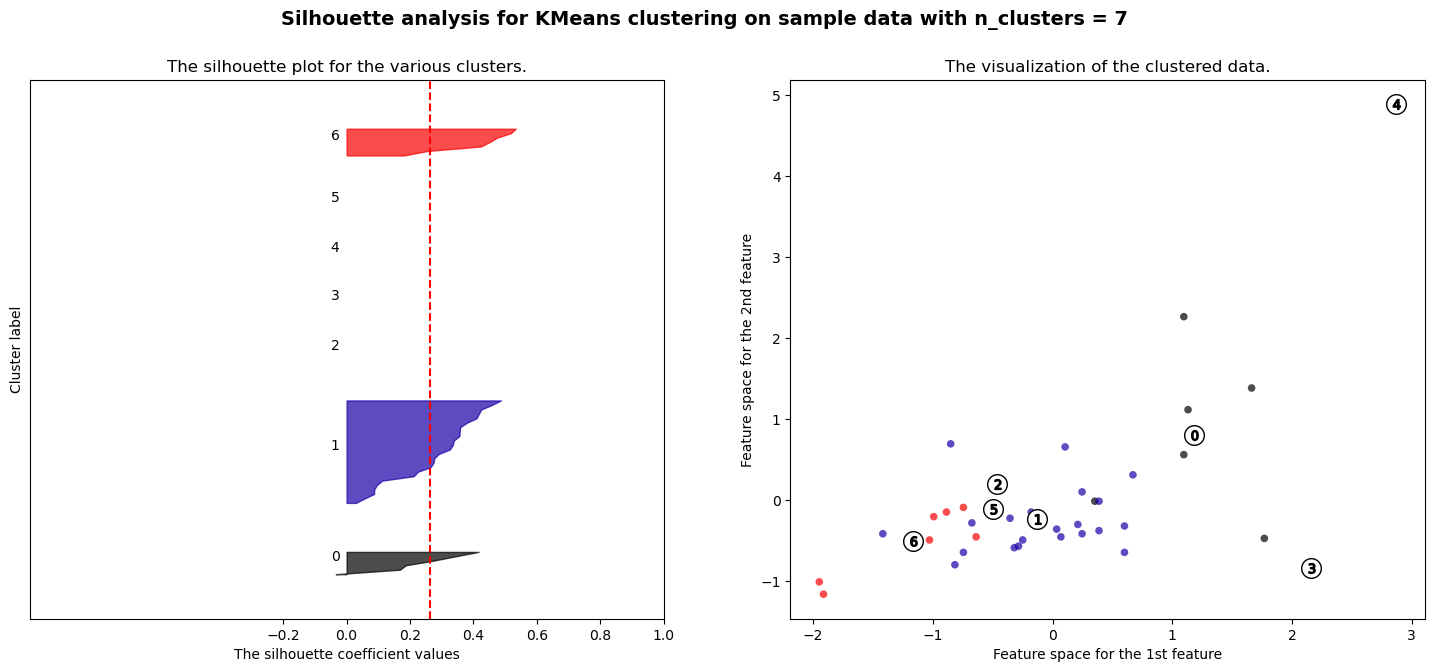

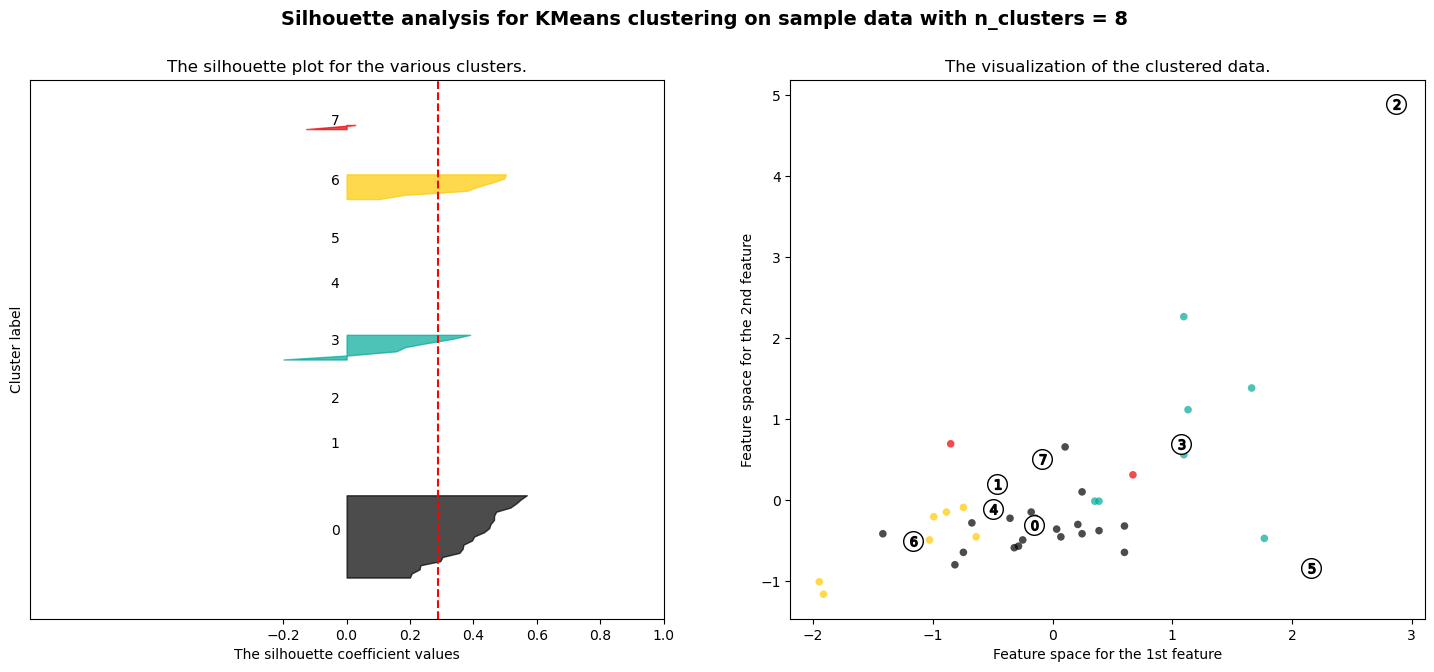

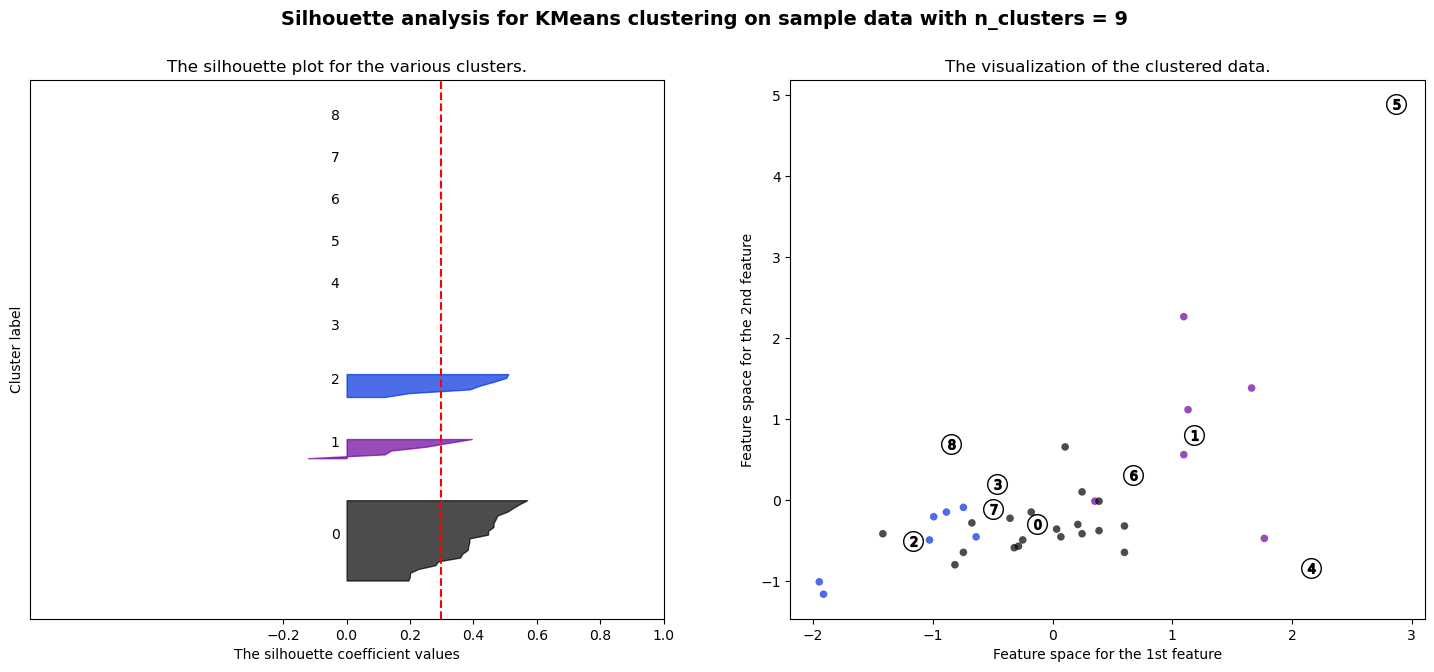

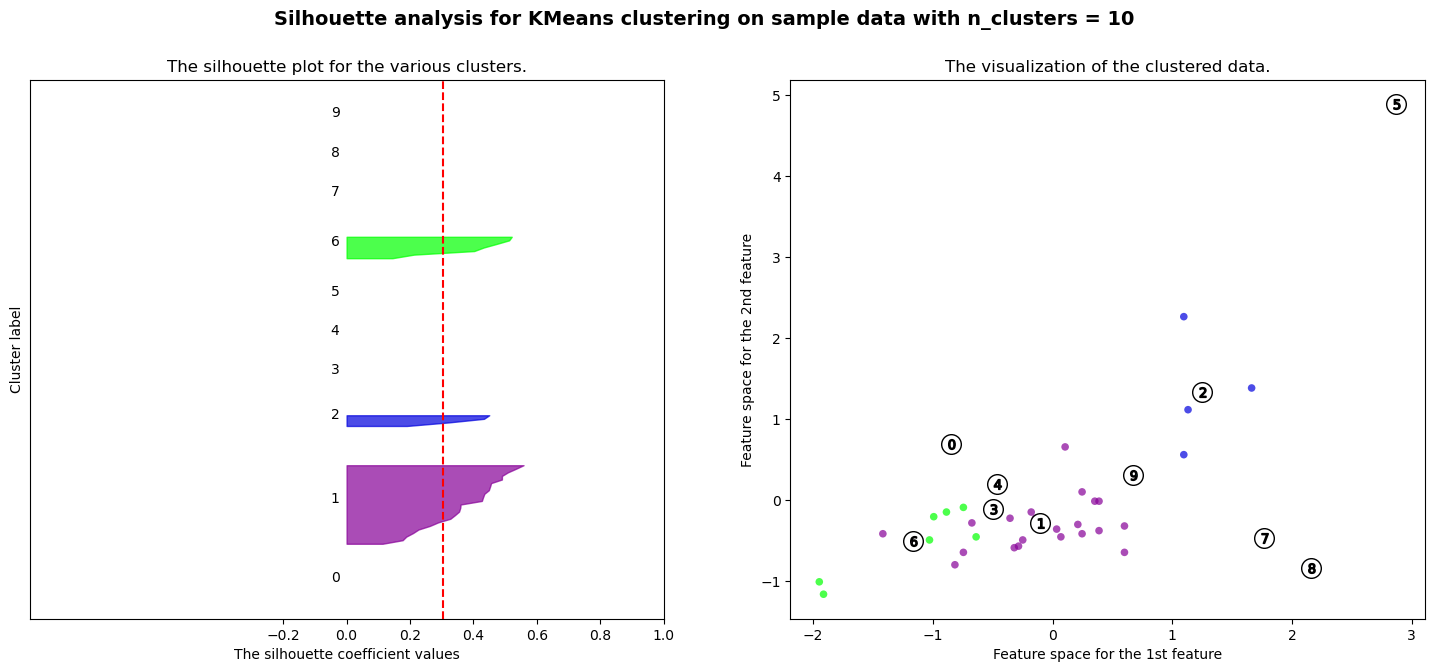

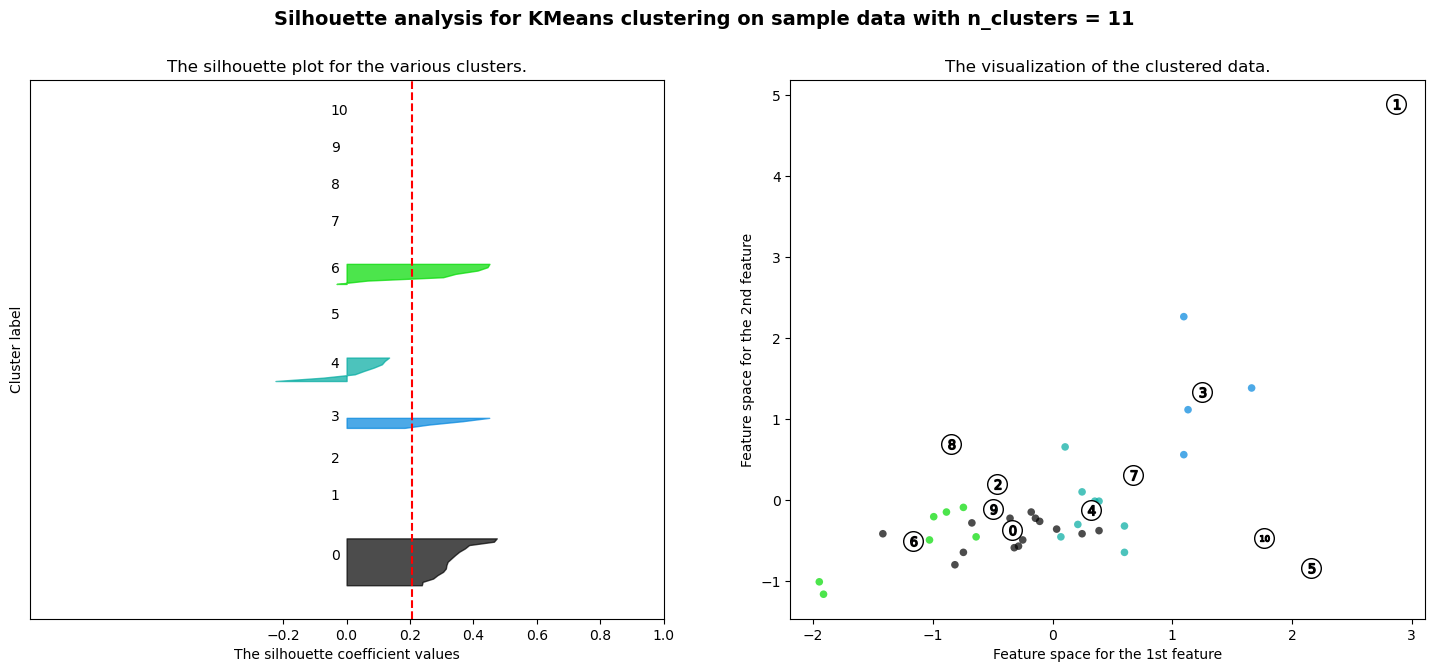

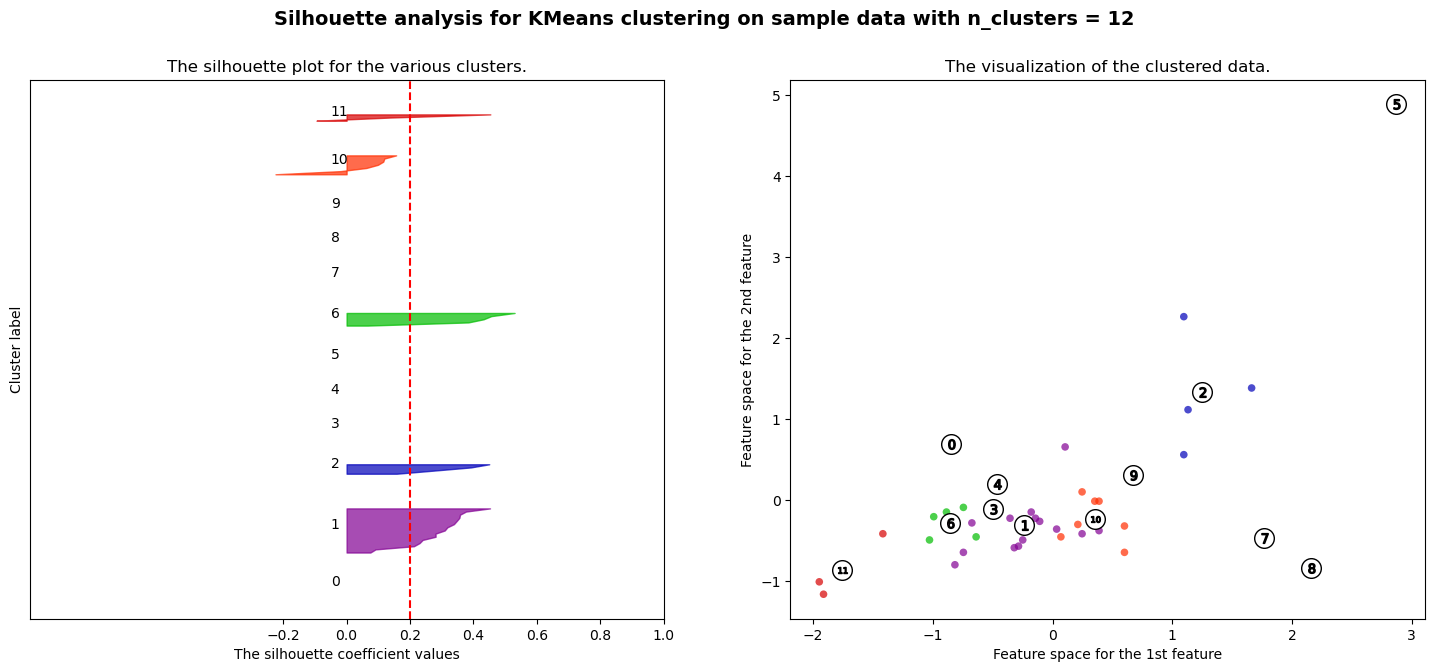

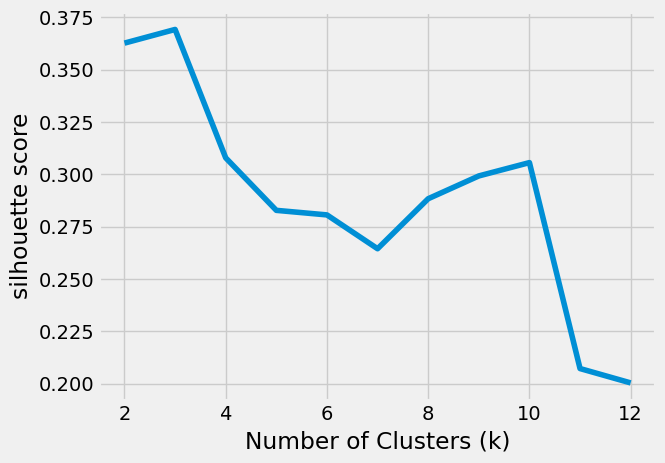

In [6]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import matplotlib.style as style

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
silhouette_avg_n_clusters = []

scaler = StandardScaler()
sil_data = arr_data_pd.to_numpy()
sil_data_scaled = scaler.fit_transform(sil_data)


#print(sil_data_scaled)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(sil_data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(sil_data_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(sil_data_scaled, cluster_labels, metric='euclidean')
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(sil_data_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(sil_data_scaled[:, 0], sil_data_scaled[:, 1], marker='o', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters), fontsize=14, fontweight='bold')

plt.show()


style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()

Graph just to double check against previous graph - use previous graph in InitialDataAnalysis as format is better

Ideally want something like this ... average score > 0.7, all clusters cross average and no negative data (wrong classified)

Note we have 'negative' data which isn't a good sign ... basically data in the wrong cluster

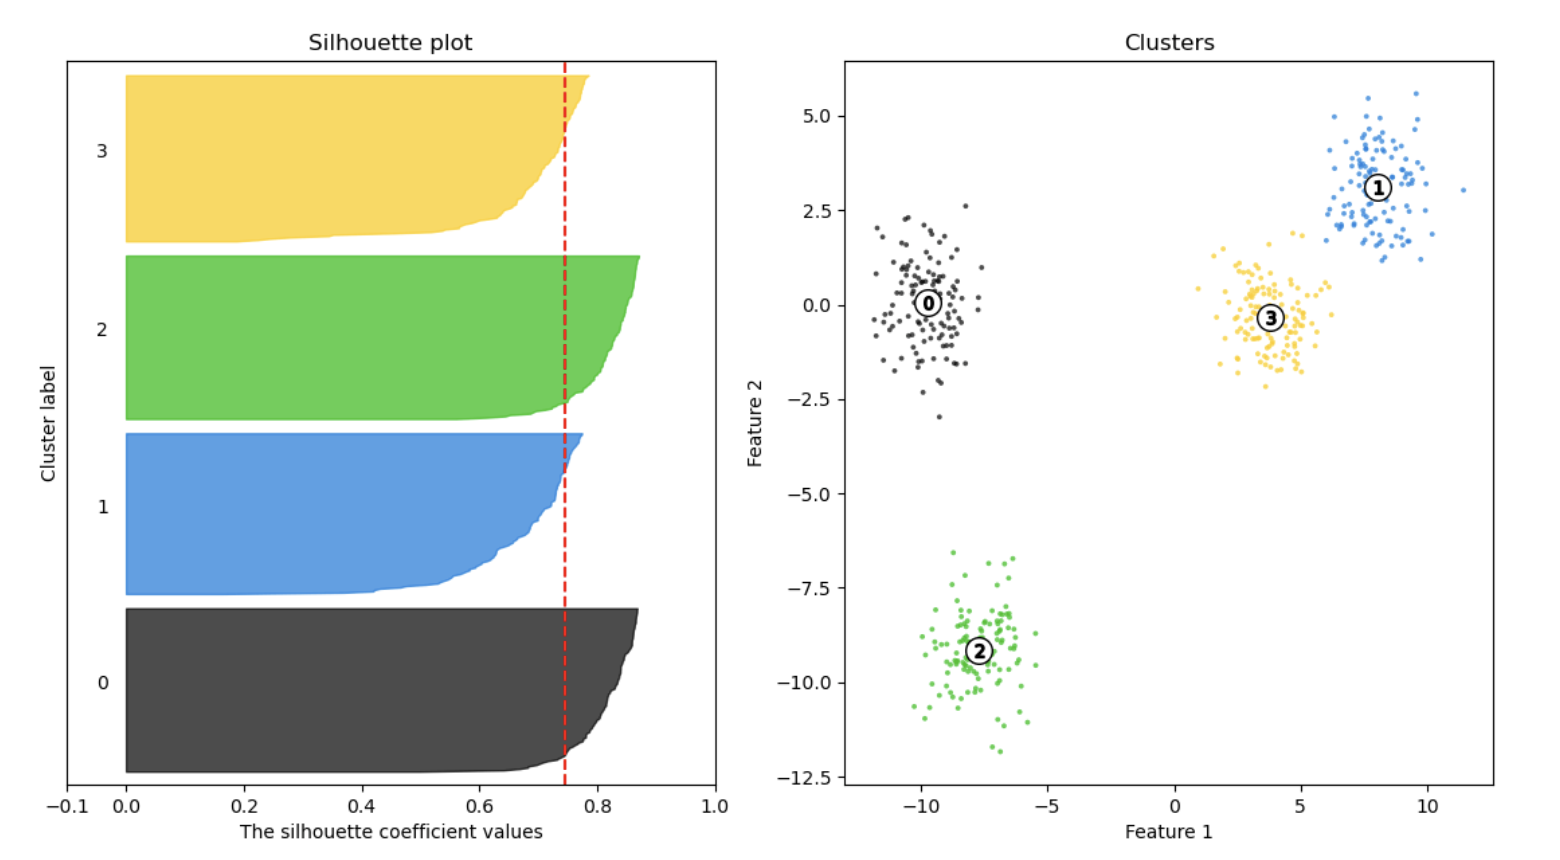